In [88]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [89]:
data = pd.read_csv("MaunaLoaDailyTemps-1.csv")

In [90]:
data

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


In [91]:
data["DATE"]=pd.to_datetime(data["DATE"])

In [92]:
data

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,657,1756
1,2014-01-02,35.0,50.0,43.0,657,1756
2,2014-01-03,36.0,45.0,41.0,657,1757
3,2014-01-04,32.0,41.0,37.0,658,1757
4,2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,2018-12-26,35.0,45.0,40.0,654,1752
1821,2018-12-27,33.0,44.0,39.0,655,1752
1822,2018-12-28,33.0,47.0,40.0,655,1753
1823,2018-12-29,36.0,47.0,42.0,655,1753


In [94]:
data

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [107]:
a = data[data['AvgTemp'] > 50.0].count()
a

MinTemp    331
MaxTemp    331
AvgTemp    331
Sunrise    331
Sunset     331
dtype: int64

In [100]:
total_sum = data[data['AvgTemp'] > 50.0]['AvgTemp'].sum()

In [101]:
total_sum

17345.0

In [102]:
days_exceeding_50 = len(data[data['AvgTemp'] > 50.0])

In [103]:
days_exceeding_50

331

In [117]:
max_temp_max_value = data['MaxTemp'].max()

In [120]:
max_temp_max_value

67.0

In [118]:
max_temp_max_rows = data[data['MaxTemp'] == max_temp_max_value]

In [119]:
max_temp_max_rows

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2015-06-18,45.0,67.0,56.0,544,1903
2016-07-03,45.0,67.0,56.0,548,1905


In [ ]:
import pandas as pd  # keep this approach

# Assuming 'data' is your DataFrame
# Replace 'data' with your actual DataFrame name

# Convert the 'Date' column to datetime if it's not already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Group by year and calculate the average temperature
average_temp_by_year = data.groupby('Year')['AvgTemp'].mean()

# Find the year with the highest average temperature
hottest_year = average_temp_by_year.idxmax()

print(f"The hottest year is: {hottest_year}")


In [93]:
data.set_index("DATE",inplace=True)

<Axes: xlabel='DATE'>

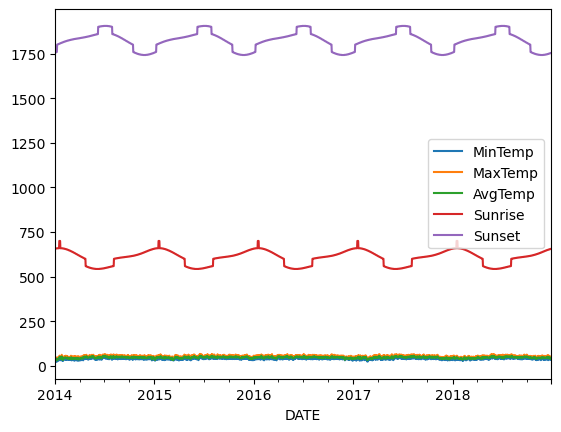

In [7]:
data.plot()
#Graph has seasonality as it is following the pattern,it is uptrend,it has noise also...

In [8]:
data.dropna(inplace = True)

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)


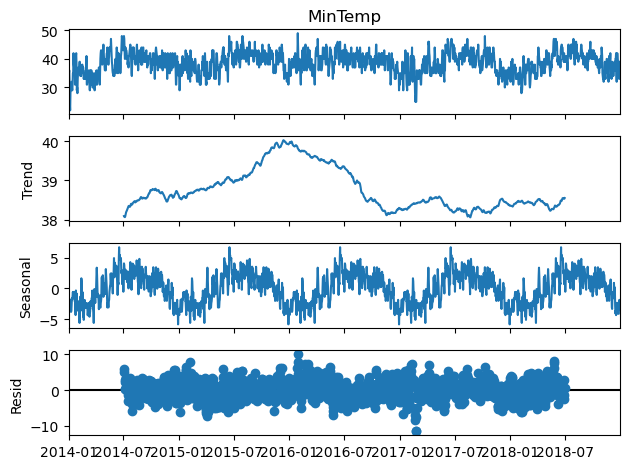

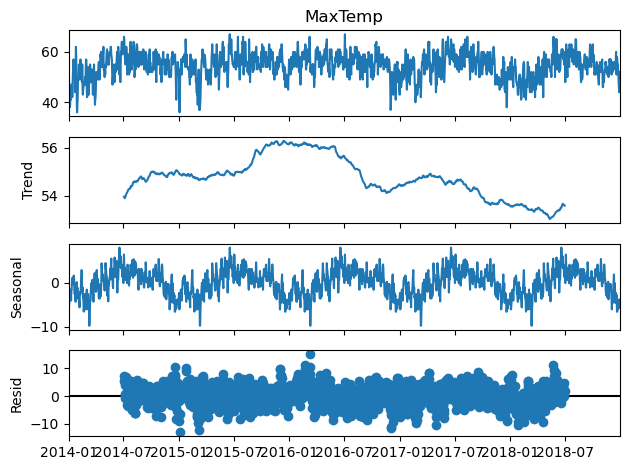

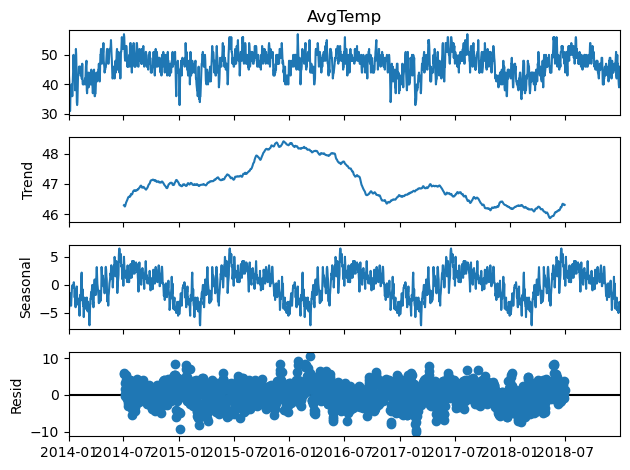

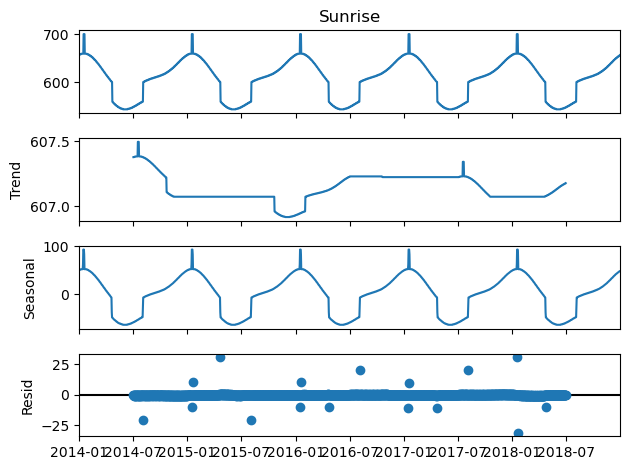

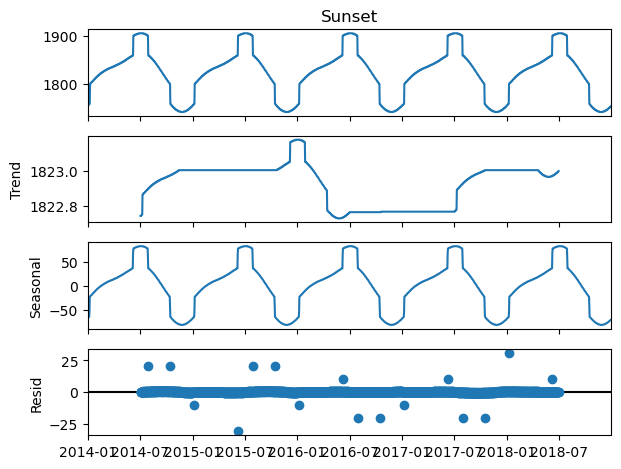

In [10]:
seasonal_period = 365  # You can adjust this based on your data

# Decompose the time series
decomposition = seasonal_decompose(data['MinTemp'], period=seasonal_period)
print(decomposition.plot())

seasonal_period = 365  # You can adjust this based on your data

# Decompose the time series
decomposition = seasonal_decompose(data['MaxTemp'], period=seasonal_period)
print(decomposition.plot())


seasonal_period = 365  # You can adjust this based on your data

# Decompose the time series
decomposition = seasonal_decompose(data['AvgTemp'], period=seasonal_period)
print(decomposition.plot())


seasonal_period = 365  # You can adjust this based on your data

# Decompose the time series
decomposition = seasonal_decompose(data['Sunrise'], period=seasonal_period)
print(decomposition.plot())

seasonal_period = 365  # You can adjust this based on your data

# Decompose the time series
decomposition = seasonal_decompose(data['Sunset'], period=seasonal_period)
print(decomposition.plot())

Text(0, 0.5, 'Residual')

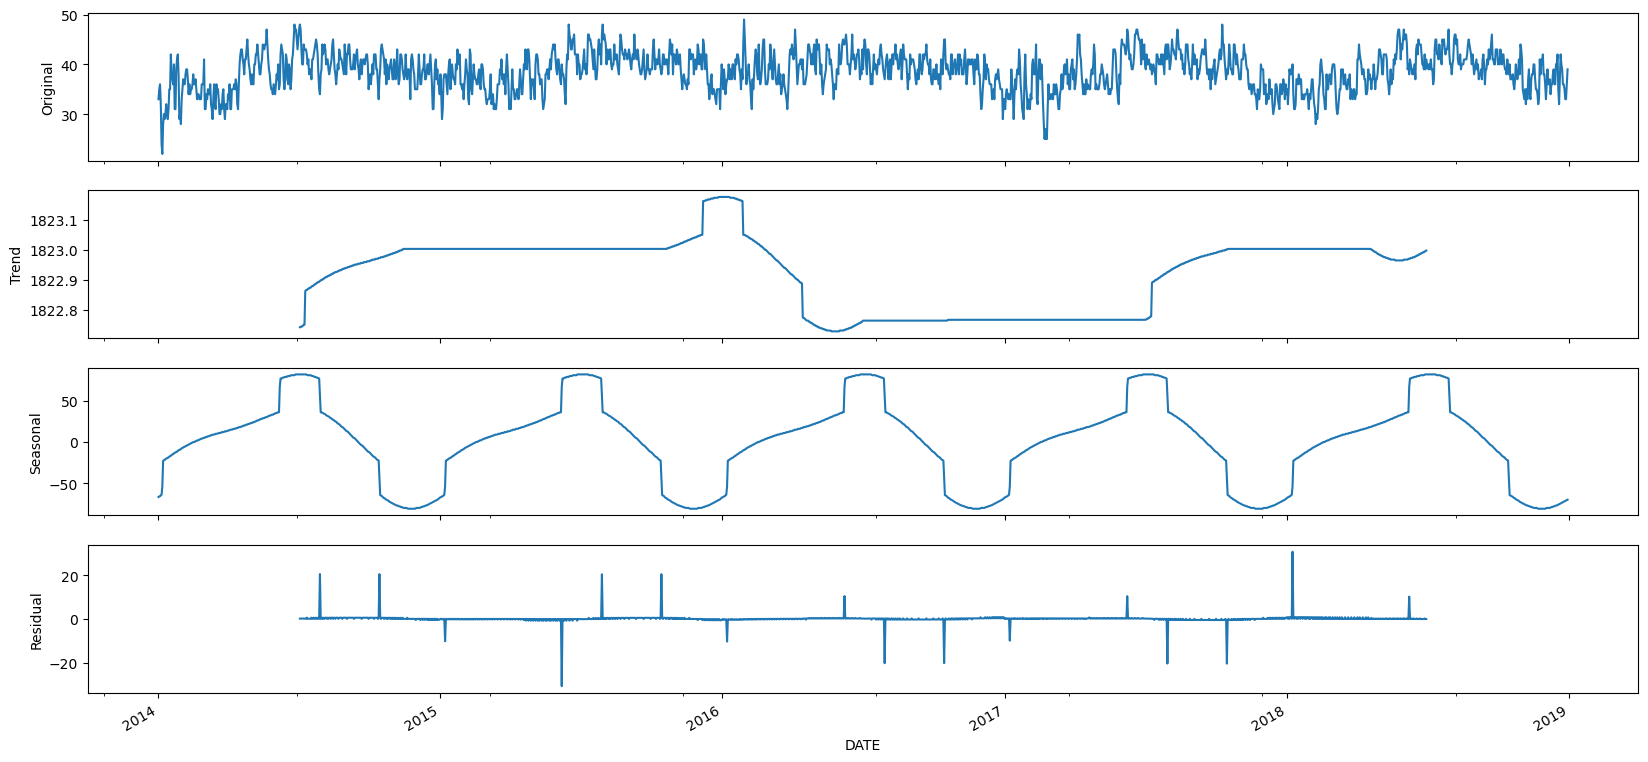

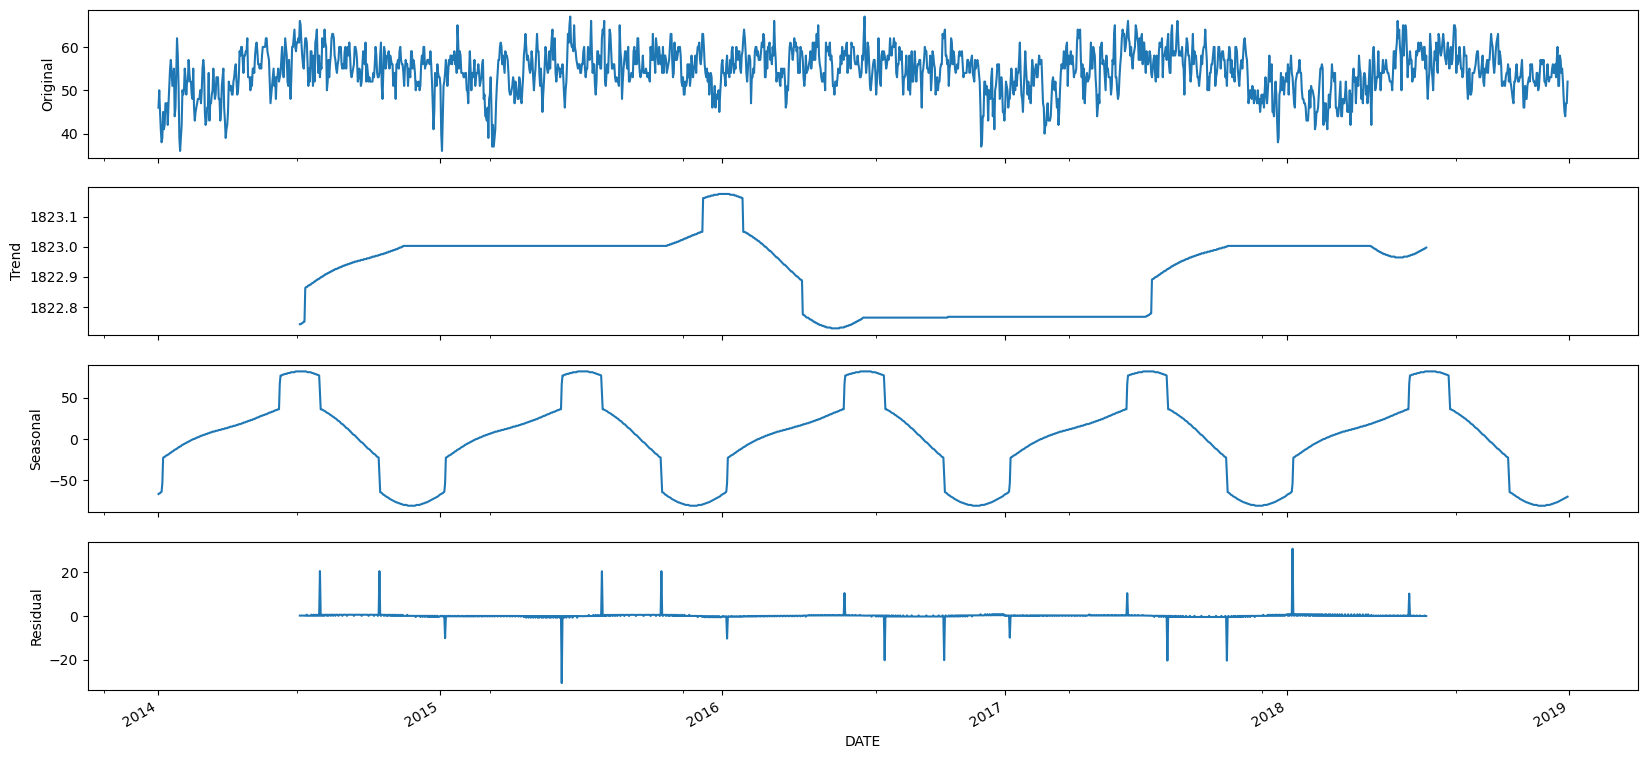

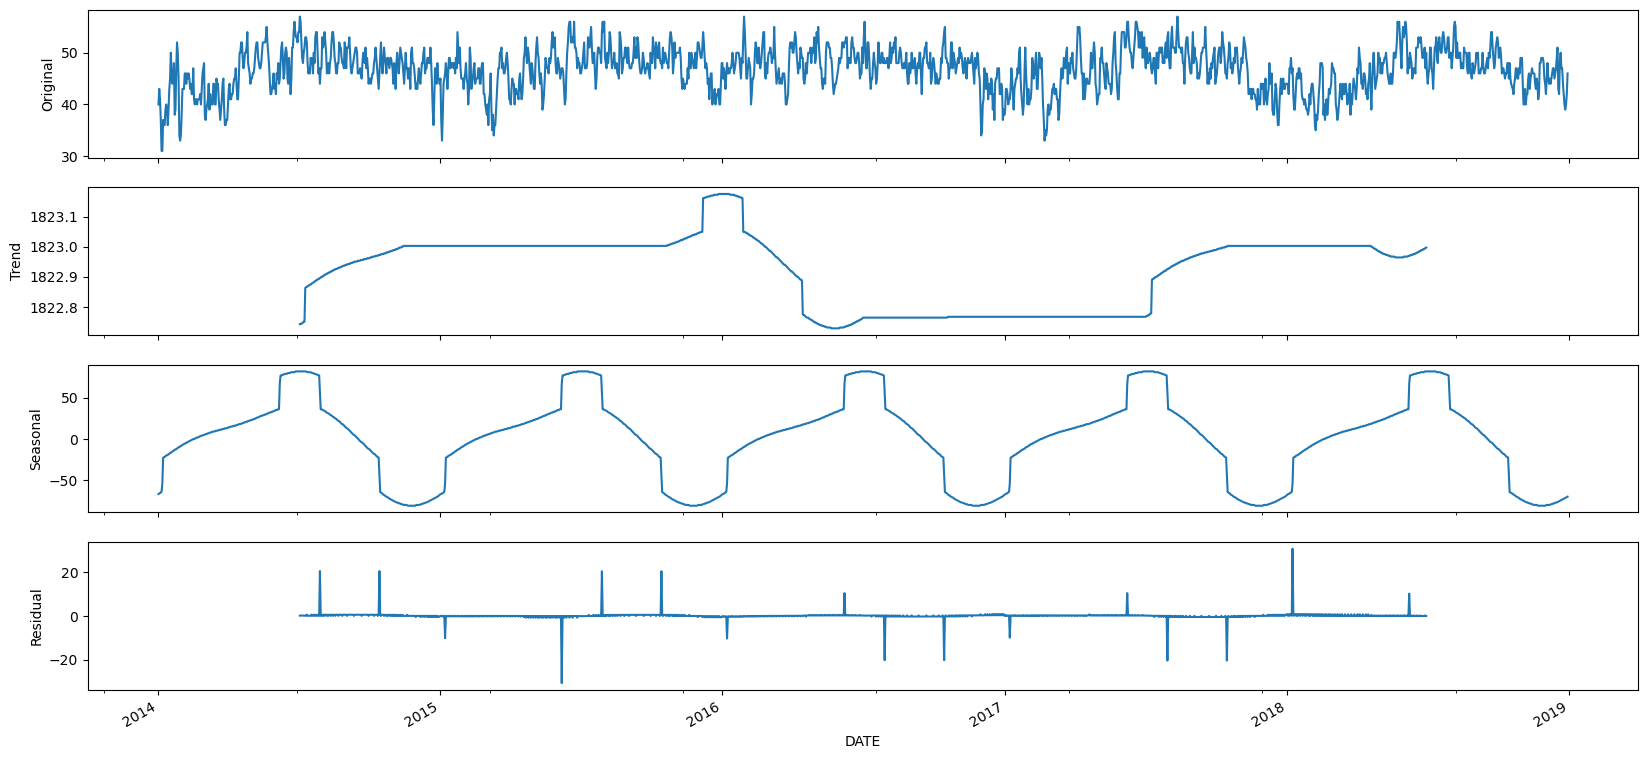

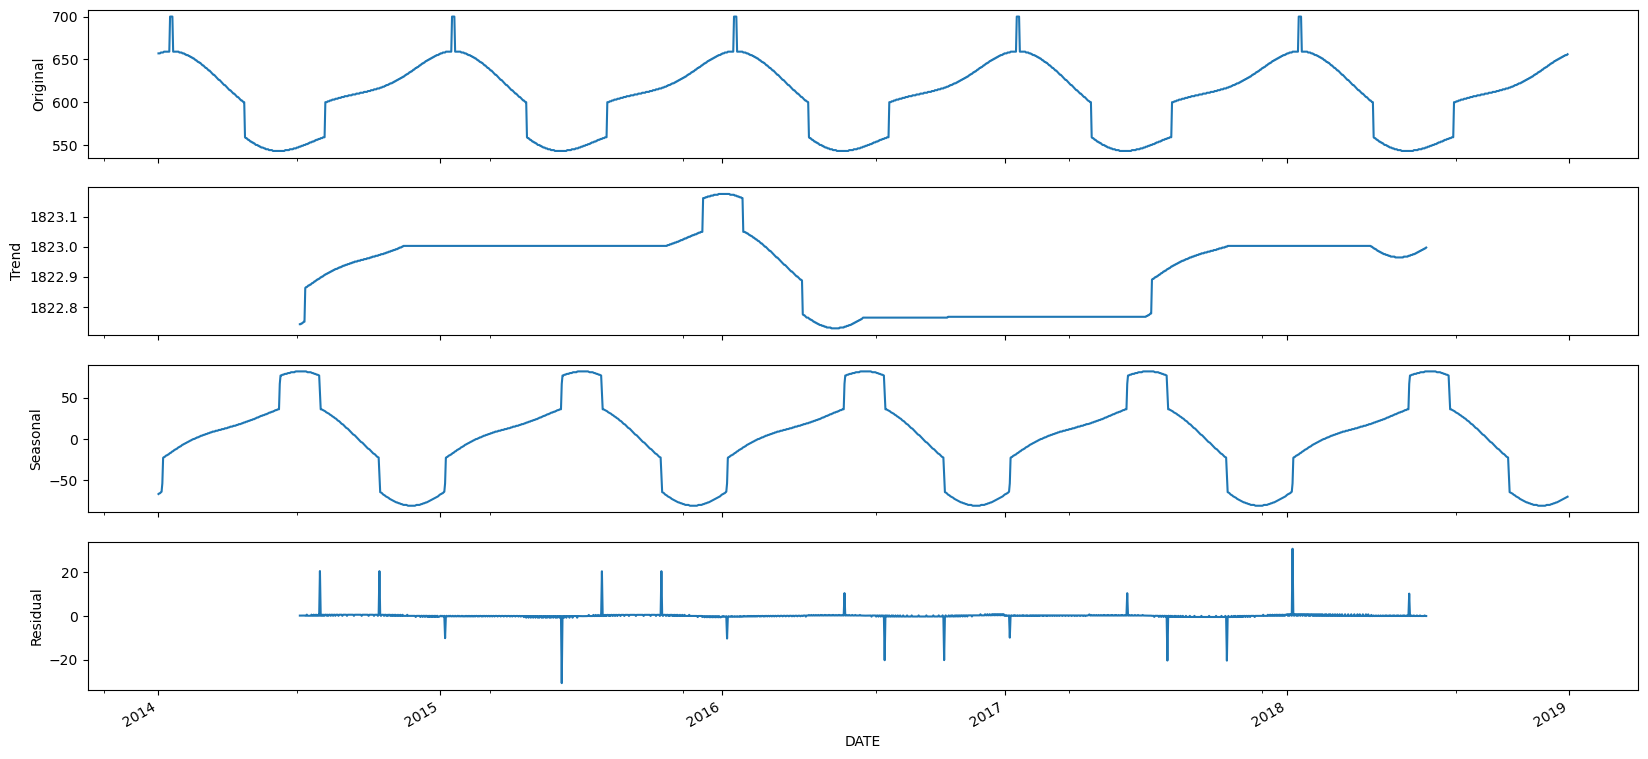

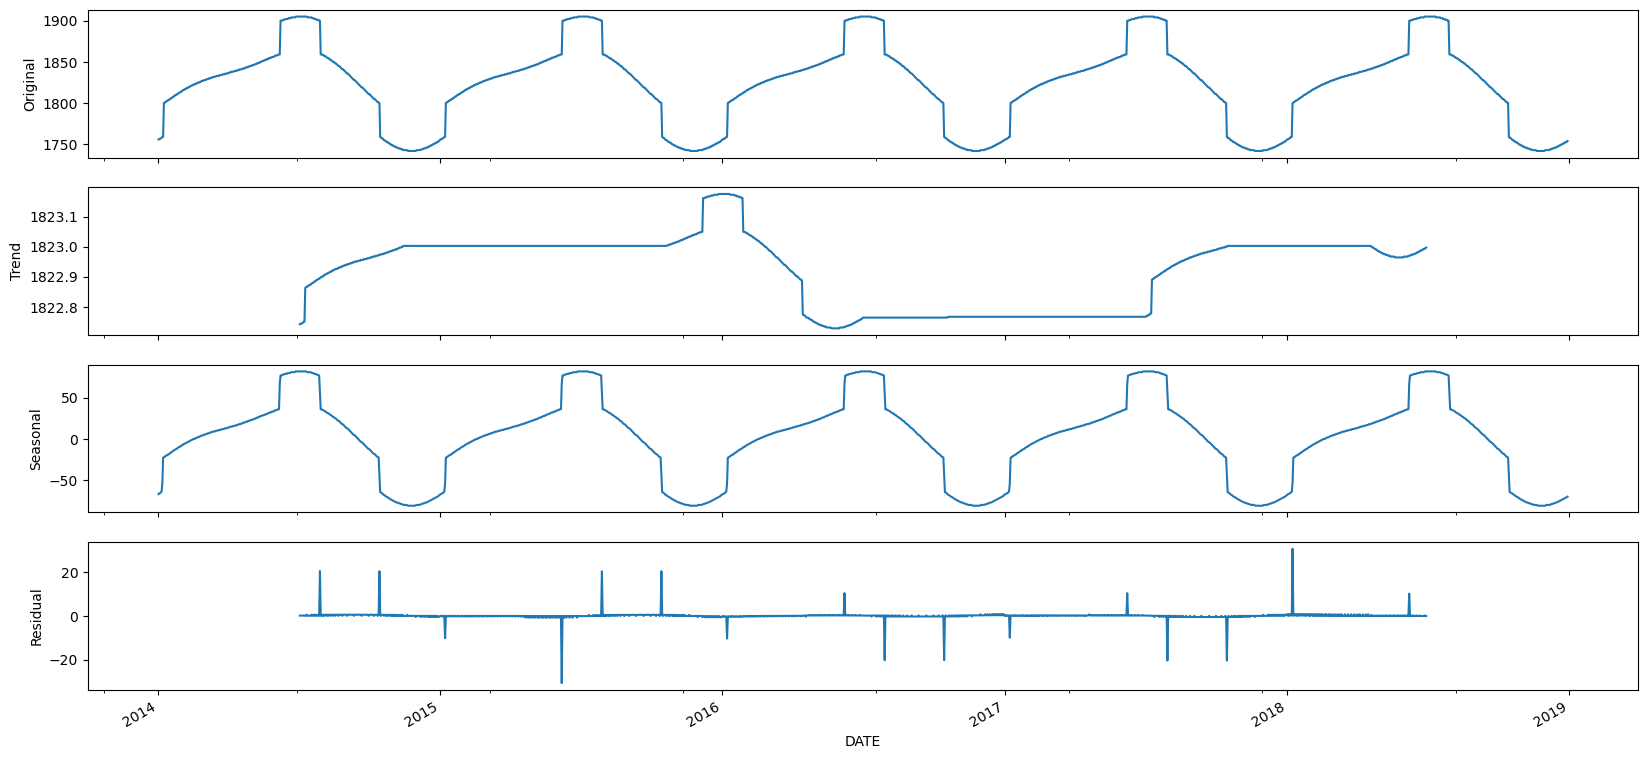

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(20, 10), sharex=True)
data['MinTemp'].plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Original')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')




fig, axes = plt.subplots(4, 1, figsize=(20, 10), sharex=True)
data['MaxTemp'].plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Original')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')




fig, axes = plt.subplots(4, 1, figsize=(20, 10), sharex=True)
data['AvgTemp'].plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Original')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')



fig, axes = plt.subplots(4, 1, figsize=(20, 10), sharex=True)
data['Sunrise'].plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Original')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')




fig, axes = plt.subplots(4, 1, figsize=(20, 10), sharex=True)
data['Sunset'].plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Original')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')

In [12]:
# proof whether the data is stationary or not

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame
# Convert columns to numeric (if needed) and drop missing values
data = data.apply(pd.to_numeric, errors='coerce').dropna()

# Iterate over columns and perform ADF test
for column in data.columns:
    result = adfuller(data[column])
    print(f'Column: {column}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('-' * 30)


Column: MinTemp
ADF Statistic: -4.371769255774837
p-value: 0.0003329067559637264
Critical Values: {'1%': -3.4339921916016345, '5%': -2.8631488249300574, '10%': -2.5676264862577503}
------------------------------
Column: MaxTemp
ADF Statistic: -7.378518387322695
p-value: 8.594583648448538e-11
Critical Values: {'1%': -3.433968010099092, '5%': -2.8631381499714745, '10%': -2.567620802173316}
------------------------------
Column: AvgTemp
ADF Statistic: -6.554680125068781
p-value: 8.67593748019951e-09
Critical Values: {'1%': -3.433972018026501, '5%': -2.8631399192826676, '10%': -2.5676217442756872}
------------------------------
Column: Sunrise
ADF Statistic: -3.2095809596629468
p-value: 0.0194367508536597
Critical Values: {'1%': -3.4339820768018106, '5%': -2.8631443597478143, '10%': -2.567624108684946}
------------------------------
Column: Sunset
ADF Statistic: -2.21013307917235
p-value: 0.20258831141601508
Critical Values: {'1%': -3.4339640110318004, '5%': -2.8631363845692475, '10%': -2.

only columns that should be stationary are : MaxTemp,AvgTemp and Sunset ,rest all are Stationary

In [ ]:
#  Let's Make the Data Stationary

In [15]:
# Rolling mean
mean_log=data.rolling(window=12).mean()   # it computes the mean of all the previous data till 12th ,includimg 12th data and place it in the 12th position as mean
std_log=data.rolling(window=12).std() # it computes the std of all the previous data till 12th ,includimg 12th data and place it in the 12th position as std

In [16]:
mean_log.head(20)

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN
2014-01-04,NaN,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN
2014-01-08,NaN,NaN,NaN,NaN,NaN
2014-01-09,NaN,NaN,NaN,NaN,NaN


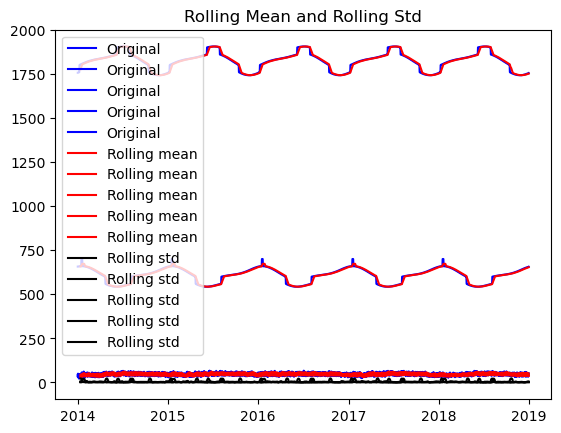

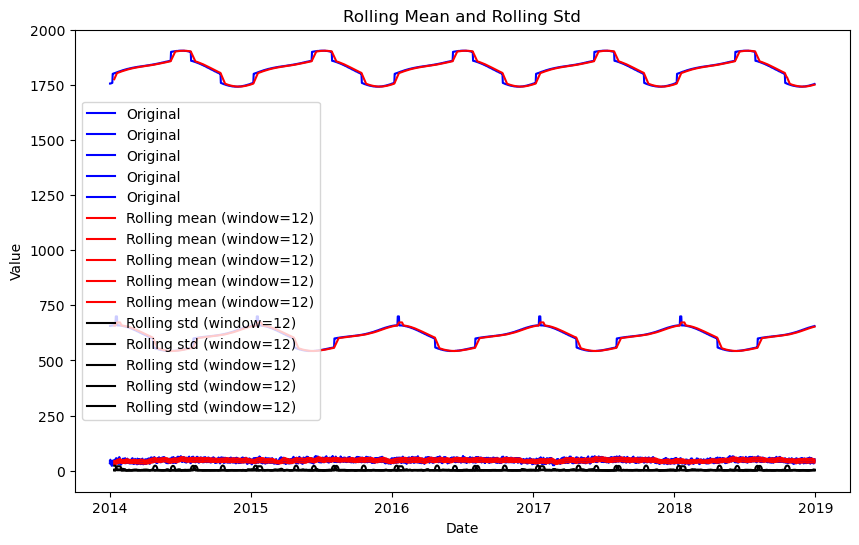

In [17]:
plt.plot(data,color = 'blue',label = 'Original')
plt.plot(mean_log,color = 'red',label = 'Rolling mean')
plt.plot(std_log,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()



plt.figure(figsize=(10, 6))
window_size =12
plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label=f'Rolling mean (window={window_size})')
plt.plot(std_log, color='black', label=f'Rolling std (window={window_size})')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()   #Both plots are same

In [18]:
# Transformation
df_log=np.log(data)

In [19]:
df_log

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,3.496508,3.828641,3.688879,6.487684,7.470794
2014-01-02,3.555348,3.912023,3.761200,6.487684,7.470794
2014-01-03,3.583519,3.806662,3.713572,6.487684,7.471363
2014-01-04,3.465736,3.713572,3.610918,6.489205,7.471363
2014-01-05,3.178054,3.637586,3.433987,6.489205,7.471932
...,...,...,...,...,...
2018-12-26,3.555348,3.806662,3.688879,6.483107,7.468513
2018-12-27,3.496508,3.784190,3.663562,6.484635,7.468513
2018-12-28,3.496508,3.850148,3.688879,6.484635,7.469084


In [20]:
mean_log=df_log.rolling(window=12).mean()
std_log=df_log.rolling(window=12).std()

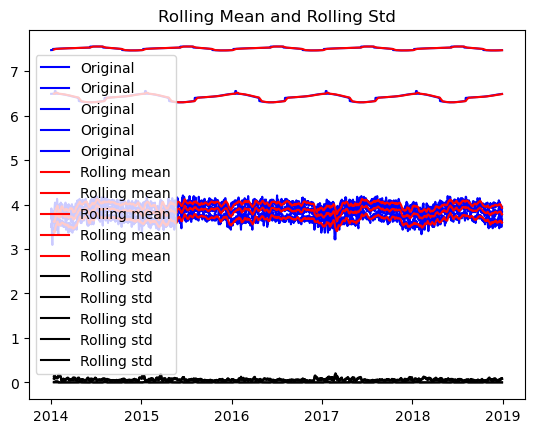

In [21]:
plt.plot(df_log,color = 'blue',label = 'Original')
plt.plot(mean_log,color = 'red',label = 'Rolling mean')
plt.plot(std_log,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [22]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame
# Convert columns to numeric (if needed) and drop missing values
data = df_log.apply(pd.to_numeric, errors='coerce').dropna()

# Iterate over columns and perform ADF test
for column in df_log.columns:
    result = adfuller(df_log[column])
    print(f'Column: {column}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('-' * 30)


Column: MinTemp
ADF Statistic: -4.401779281757864
p-value: 0.00029468780268947567
Critical Values: {'1%': -3.4339921916016345, '5%': -2.8631488249300574, '10%': -2.5676264862577503}
------------------------------
Column: MaxTemp
ADF Statistic: -7.4100256926264505
p-value: 7.174719010822554e-11
Critical Values: {'1%': -3.433968010099092, '5%': -2.8631381499714745, '10%': -2.567620802173316}
------------------------------
Column: AvgTemp
ADF Statistic: -6.606100178649549
p-value: 6.550935867313438e-09
Critical Values: {'1%': -3.433972018026501, '5%': -2.8631399192826676, '10%': -2.5676217442756872}
------------------------------
Column: Sunrise
ADF Statistic: -3.2255158369156343
p-value: 0.018554421711924365
Critical Values: {'1%': -3.4339820768018106, '5%': -2.8631443597478143, '10%': -2.567624108684946}
------------------------------
Column: Sunset
ADF Statistic: -2.198198131038649
p-value: 0.20690008123913334
Critical Values: {'1%': -3.4339640110318004, '5%': -2.8631363845692475, '10%

In [23]:
new_data=df_log-mean_log

In [24]:
new_data

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN
2014-01-04,NaN,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-12-26,-0.074646,-0.168359,-0.133364,0.003833,0.001714
2018-12-27,-0.117455,-0.175323,-0.143133,0.004594,0.001428
2018-12-28,-0.101424,-0.093290,-0.100903,0.003828,0.001713


In [25]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

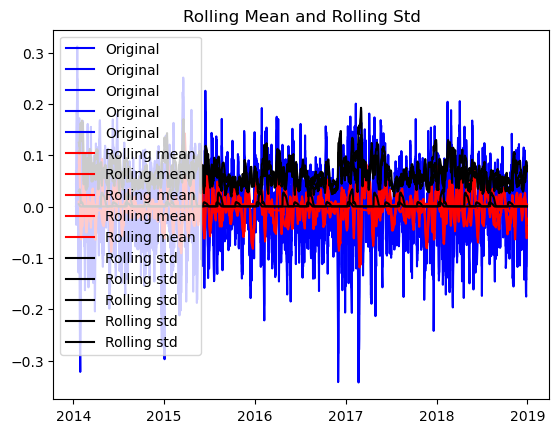

In [26]:
plt.plot(new_data,color = 'blue',label = 'Original')
plt.plot(mean_log,color = 'red',label = 'Rolling mean')
plt.plot(std_log,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [27]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame
# Convert columns to numeric (if needed) and drop missing values
data = new_data.apply(pd.to_numeric, errors='coerce').dropna()

# Iterate over columns and perform ADF test
for column in new_data.columns:
    result = adfuller(new_data[column])
    print(f'Column: {column}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('-' * 30)


MissingDataError: exog contains inf or nans

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'new_data' is your DataFrame
# Convert columns to numeric (if needed) and handle infinite or NaN values
new_data = new_data.apply(pd.to_numeric, errors='coerce')
new_data = new_data.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
new_data = new_data.dropna()

# Iterate over columns and perform ADF test
for column in new_data.columns:
    result = adfuller(new_data[column])
    print(f'Column: {column}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('-' * 30)


In [28]:
#NOW the data is stationary

In [29]:
new_data.shape

(1821, 5)

In [30]:
new_data.dropna(inplace =True)

In [31]:
new_data.shape

(1810, 5)

In [32]:
new_data.columns

Index(['MinTemp', 'MaxTemp', 'AvgTemp', 'Sunrise', 'Sunset'], dtype='object')

# Model Building 

# ARIMA

ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal AutoRegressive Integrated Moving Average) are two popular models for analyzing and forecasting time series data.

ARIMA is a statistical model that uses the past values of a time series to predict its future values. It has three components: autoregression (AR), differencing (I), and moving average (MA).

In [33]:
train1=new_data.iloc[:1500,:]["MinTemp"]
test1=new_data.iloc[1500:,:]["MinTemp"]

train2=new_data.iloc[:1500,:]["MaxTemp"]
test2=new_data.iloc[1500:,:]["MaxTemp"]

train3=new_data.iloc[:1500,:]["AvgTemp"]
test3=new_data.iloc[1500:,:]["AvgTemp"]


trai4n=new_data.iloc[:1500,:]["Sunrise"]
test4=new_data.iloc[1500:,:]["Sunrise"]


train5=new_data.iloc[:1500,:]["Sunset"]
test5=new_data.iloc[1500:,:]["Sunset"]


In [34]:
train3

DATE
2014-01-12    0.043853
2014-01-13   -0.027410
2014-01-14    0.060770
2014-01-15    0.154439
2014-01-16    0.183589
                ...   
2018-02-18   -0.042745
2018-02-19   -0.125337
2018-02-20   -0.074858
2018-02-21   -0.033402
2018-02-22   -0.107223
Name: AvgTemp, Length: 1500, dtype: float64

In [35]:
test3

DATE
2018-02-23   -0.051864
2018-02-24    0.022372
2018-02-25    0.009969
2018-02-26    0.042667
2018-02-27    0.072907
                ...   
2018-12-26   -0.133364
2018-12-27   -0.143133
2018-12-28   -0.100903
2018-12-29   -0.035934
2018-12-30    0.049418
Name: AvgTemp, Length: 310, dtype: float64

In [36]:
# Model implementation

In [48]:
from statsmodels.tsa.arima.model import ARIMA

In [49]:
model= ARIMA(train1,order=(7,1,7))  # (p,d,q) p = 7 any random but it should adjust for the data ,D = no of transformations did,here it is 1 and last q any random number like p

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [50]:
model=model.fit()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
new_data['predict']=model.predict(start=len(train1),end=len(train1)+len(test1)-1)


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [52]:
new_data.head(20)

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,predict
DATE,,,,,,
2014-01-12,0.006278,0.069281,0.043853,0.001266,0.015304,NaN
2014-01-13,-0.016856,-0.035616,-0.027410,0.001013,0.013102,NaN
2014-01-14,0.059949,0.082019,0.060770,0.000759,0.011410,NaN
2014-01-15,0.183657,0.153266,0.154439,0.000506,0.009210,NaN
2014-01-16,0.176189,0.204294,0.183589,0.055707,0.007518,NaN
2014-01-17,0.311876,0.206223,0.249114,0.050550,0.005827,NaN
2014-01-18,0.166248,0.125038,0.132844,0.045394,0.003629,NaN
2014-01-19,0.116353,0.057449,0.073953,0.040238,0.001939,NaN
2014-01-20,0.073761,0.074522,0.077831,-0.020119,0.002123,NaN


<Axes: xlabel='DATE'>

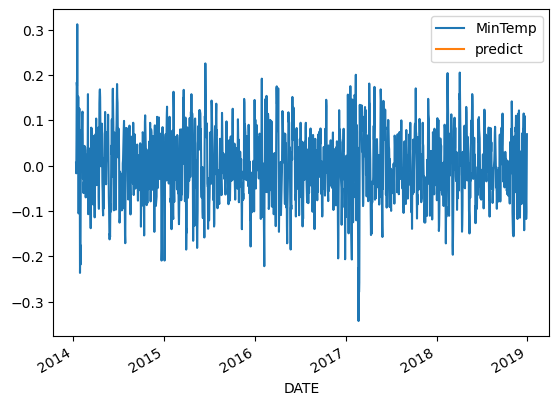

In [53]:
new_data[['MinTemp','predict']].plot()


<Figure size 4000x1000 with 0 Axes>

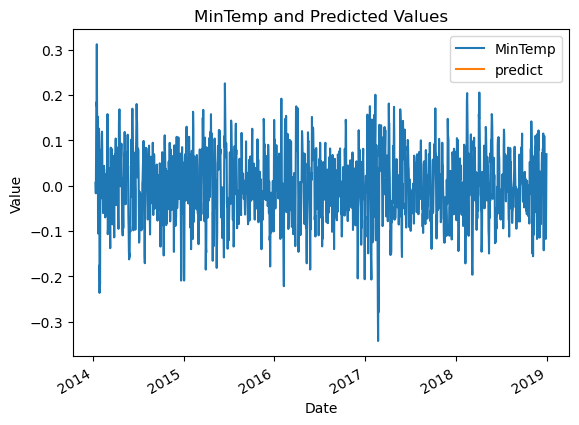

In [54]:
import matplotlib.pyplot as plt

# Assuming 'new_data' is your DataFrame
plt.figure(figsize=(40, 10))

# Plot 'MinTemp' and 'predict' columns
new_data[['MinTemp', 'predict']].plot()

plt.legend(loc='best')
plt.title('MinTemp and Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()


In [ ]:
# Since the forecasting are not good, we will choose the optimal values of p,d,q

In [55]:
# we will use here itertools to get the optimal value of p,d,q
import itertools

p=range(8)
d=range(1,2)
q=range(8)
pdq_combination=list(itertools.product(p,d,q))
pdq_combination


[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

In [56]:
len(pdq_combination)

64

In [57]:
from sklearn.metrics import mean_squared_error

In [68]:
rmse = []
order1 =[]
for pdq in pdq_combination:
    model = ARIMA(train1, order = pdq)
    model_fit = model.fit()
    pred = model_fit.predict(start = len(train1), end= len(train1)+len(test1)-1)
    error = np.sqrt(mean_squared_error(test1,pred))
    order1.append(pdq)
    rmse.append(error)

results = pd.DataFrame(index = order1, data = rmse, columns=['RMSE'])


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

In [65]:
results.sort_values(by="RMSE")

,RMSE
"(7, 1, 2)",0.068909
"(6, 1, 1)",0.068958
"(7, 1, 3)",0.068963
"(5, 1, 1)",0.068970
"(6, 1, 2)",0.068971
...,...
"(6, 1, 0)",0.072583
"(2, 1, 0)",0.074213
"(3, 1, 0)",0.076345
"(5, 1, 0)",0.076407


In [67]:
results

,RMSE
"(0, 1, 0)",0.072577
"(0, 1, 1)",0.070377
"(0, 1, 2)",0.069022
"(0, 1, 3)",0.069060
"(0, 1, 4)",0.069069
...,...
"(7, 1, 3)",0.068963
"(7, 1, 4)",0.068999
"(7, 1, 5)",0.069021
"(7, 1, 6)",0.069071


In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train1,order=(7,1,7),seasonal_order=(7,1,7,12)) # X is exogeneous variable exog="column name"
model=model.fit()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


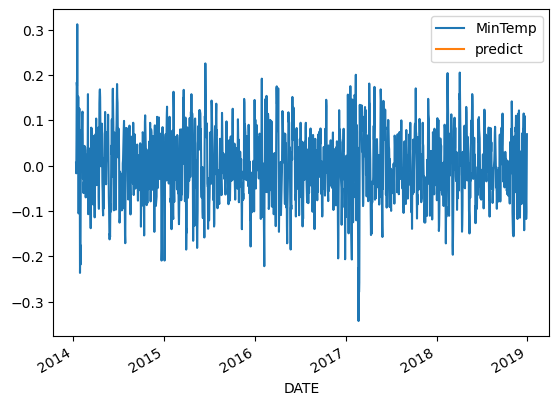

In [78]:
new_data["predict"]=model.predict(start=len(train1), end=len(train1)+len(test1)-1)
new_data[['MinTemp','predict']].plot()
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


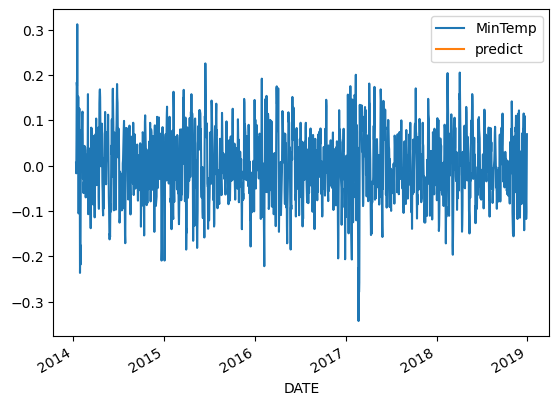

In [87]:
import matplotlib.pyplot as plt
new_data["predict"] = model.predict(start=len(train1), end=len(train1) + len(test1) - 1)
new_data[['MinTemp', 'predict']].plot()
plt.show()
